In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
def find_data(path : str) -> list:

    files = os.listdir(path)
    data = [None for _ in range(len(files))]

    with tqdm(total=len(files)) as pbar:
        for file in files:
            file_path = os.path.join(path, file)
            name, _ = os.path.splitext(file)
            data[int(name)-1] = np.array(pd.read_excel(file_path).values)
            pbar.update(1)
    
    return data

In [4]:
title = 'Strees-Strain Triangle-3'
data = find_data('/home/corn/Documents/ScienceFair/Data/Data_2/Triangle/3')
savePath = f'/home/corn/Documents/ScienceFair/Test2/Output/{title}.png'

100%|██████████| 35/35 [00:03<00:00,  8.90it/s]


Draw strees - strain

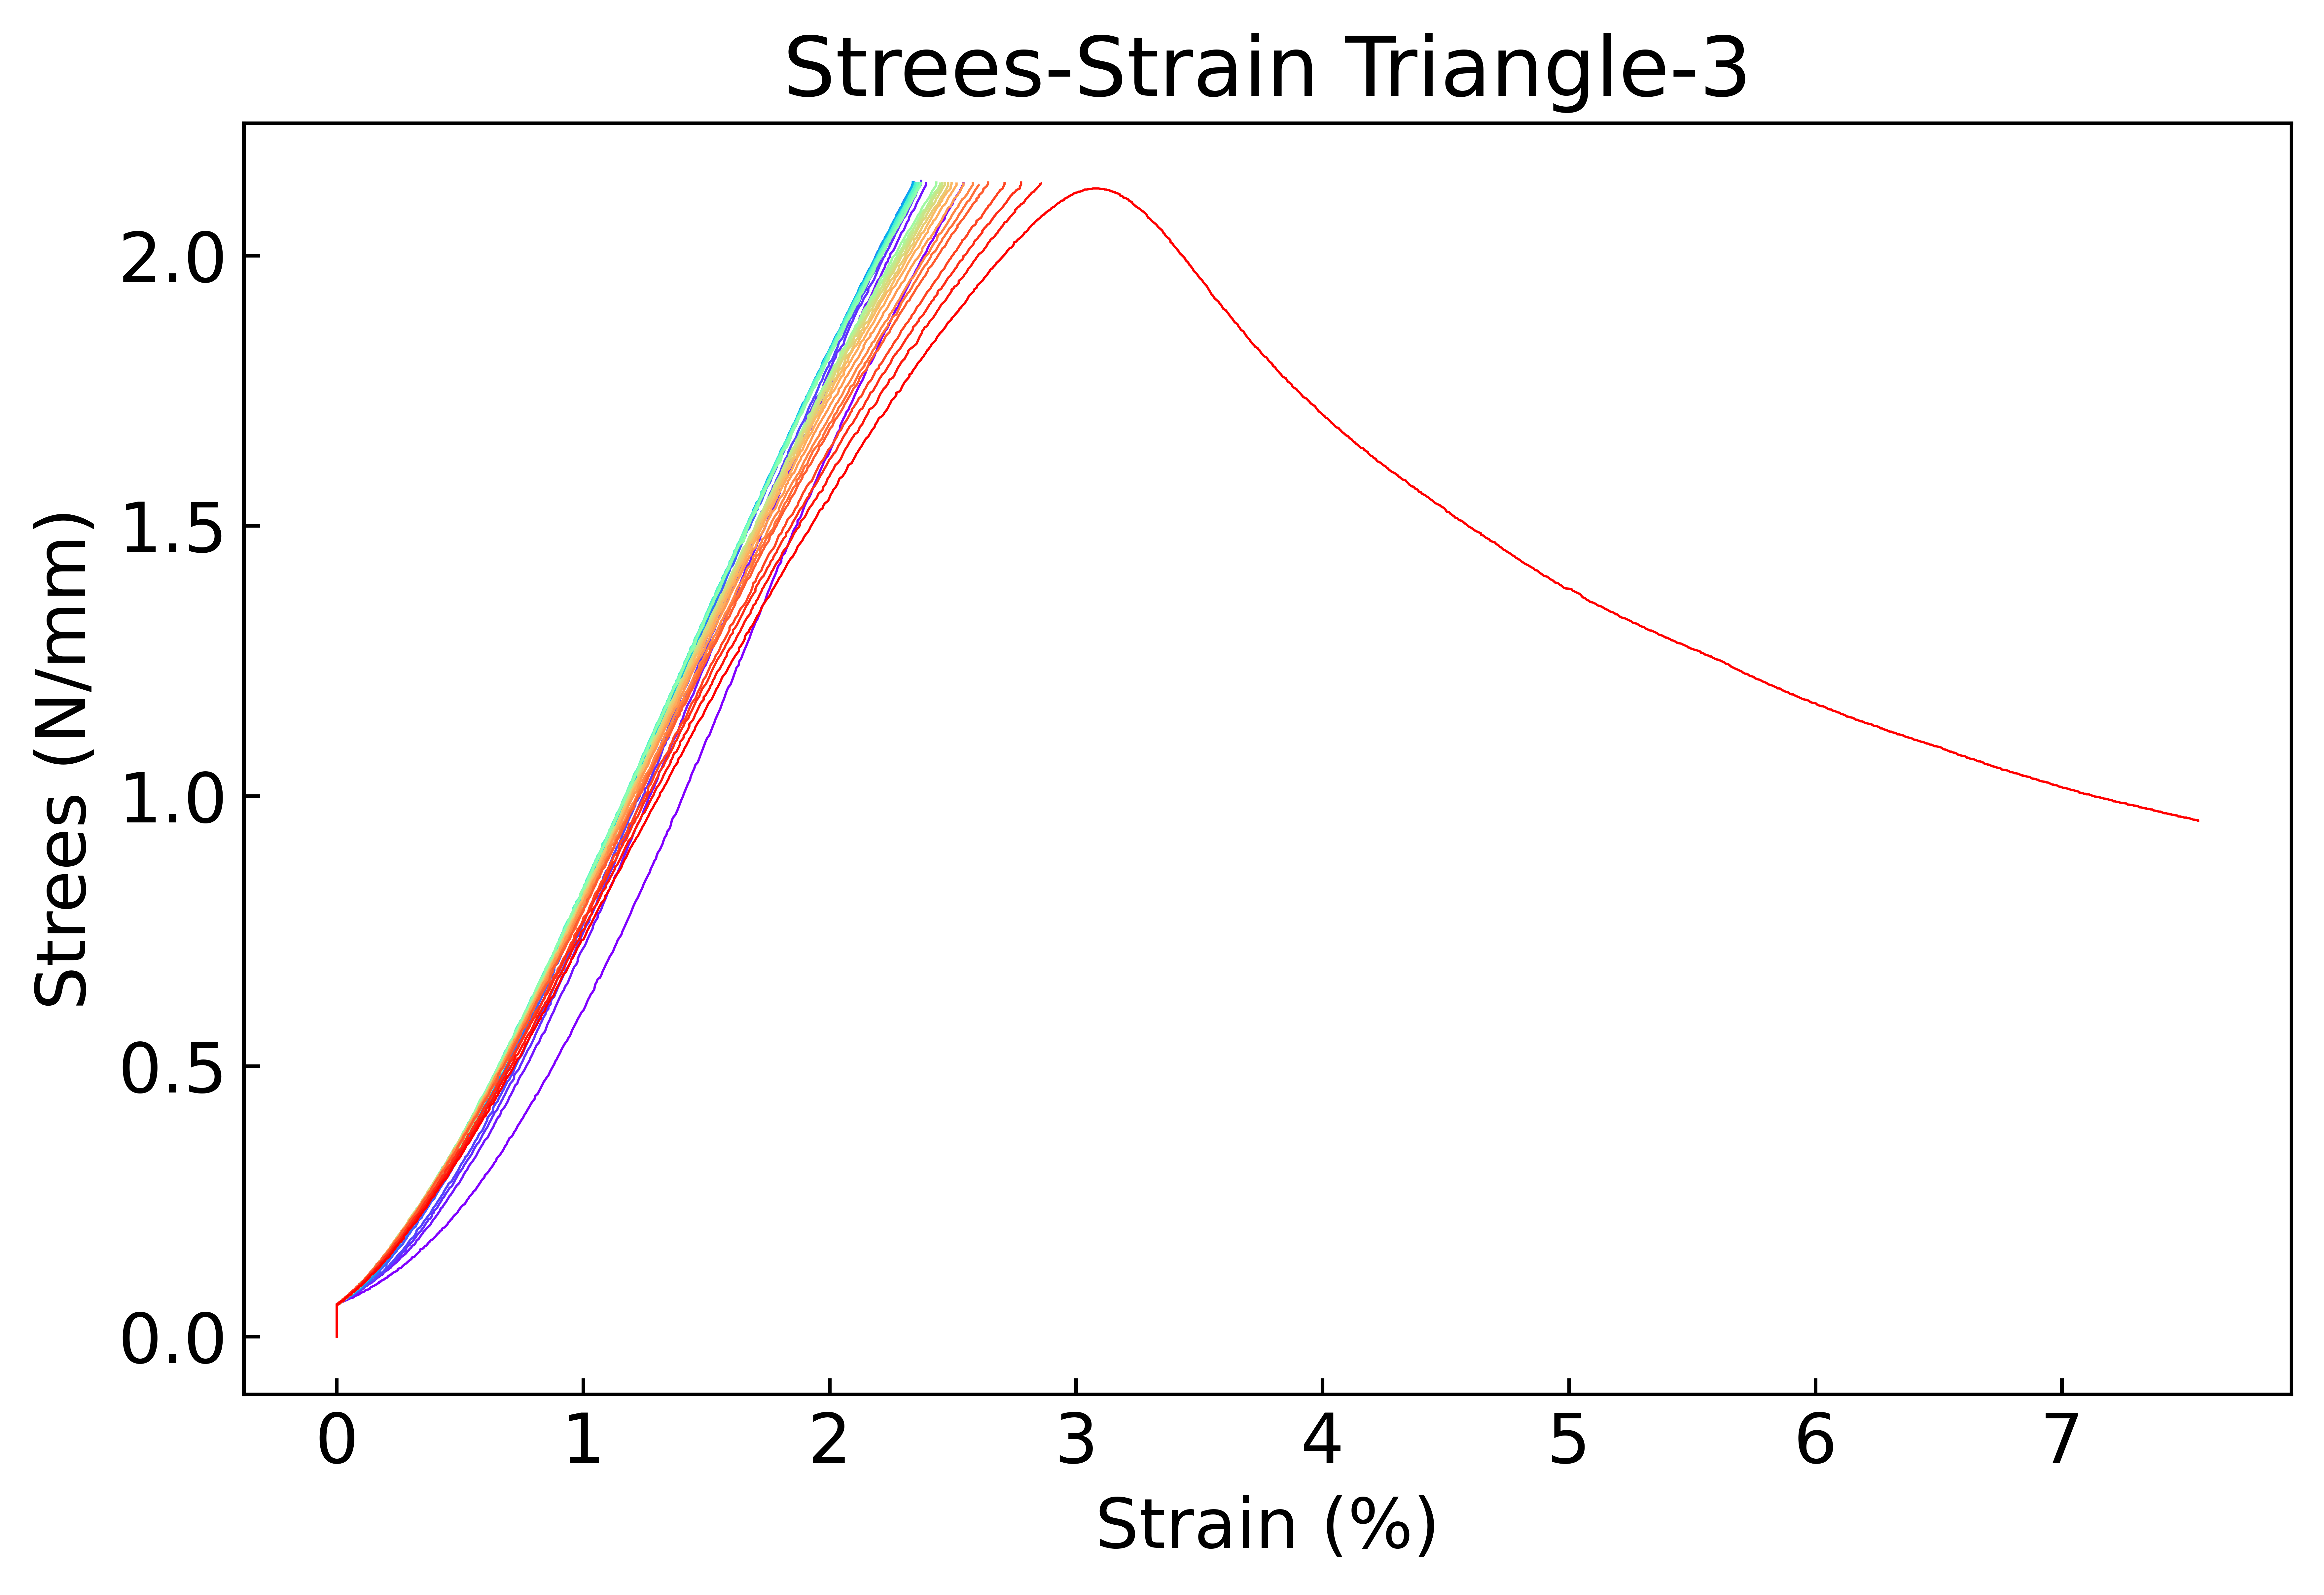

In [6]:
# set style and size

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 5), dpi=1000)
colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# draw

for i in range(0, len(data)):
    plt.plot(data[i][:,5], data[i][:,4], label=i, color=colors[i], linewidth=0.5) # 1:mm 4:應力 5:應變

# set other

plt.xlabel("Strain (%)")
plt.ylabel("Strees (N/mm)")

plt.title(title)

# save img and show

plt.savefig(savePath, bbox_inches='tight')

plt.show()

Draw deformation

In [19]:
# find start

start = next(i[1] for i in data[0] if i[4] != 0)

for i in range(len(data)):
    data[i][:,1] = (data[i][:,1] - start) / 15

# find max value in evrey line

max_values_sum = sum(max(data[j][:, 4]) for j in range(len(data)-1))
average_max_value = max_values_sum / (len(data)-1) if len(data)-1 > 0 else max(data[0][:, 4])

# find max and min deformation

min_deformation = data[0][np.argmax(data[0][:,4])][1]
max_deformation = data[-1][np.argmax(data[-1][:,4])][1]

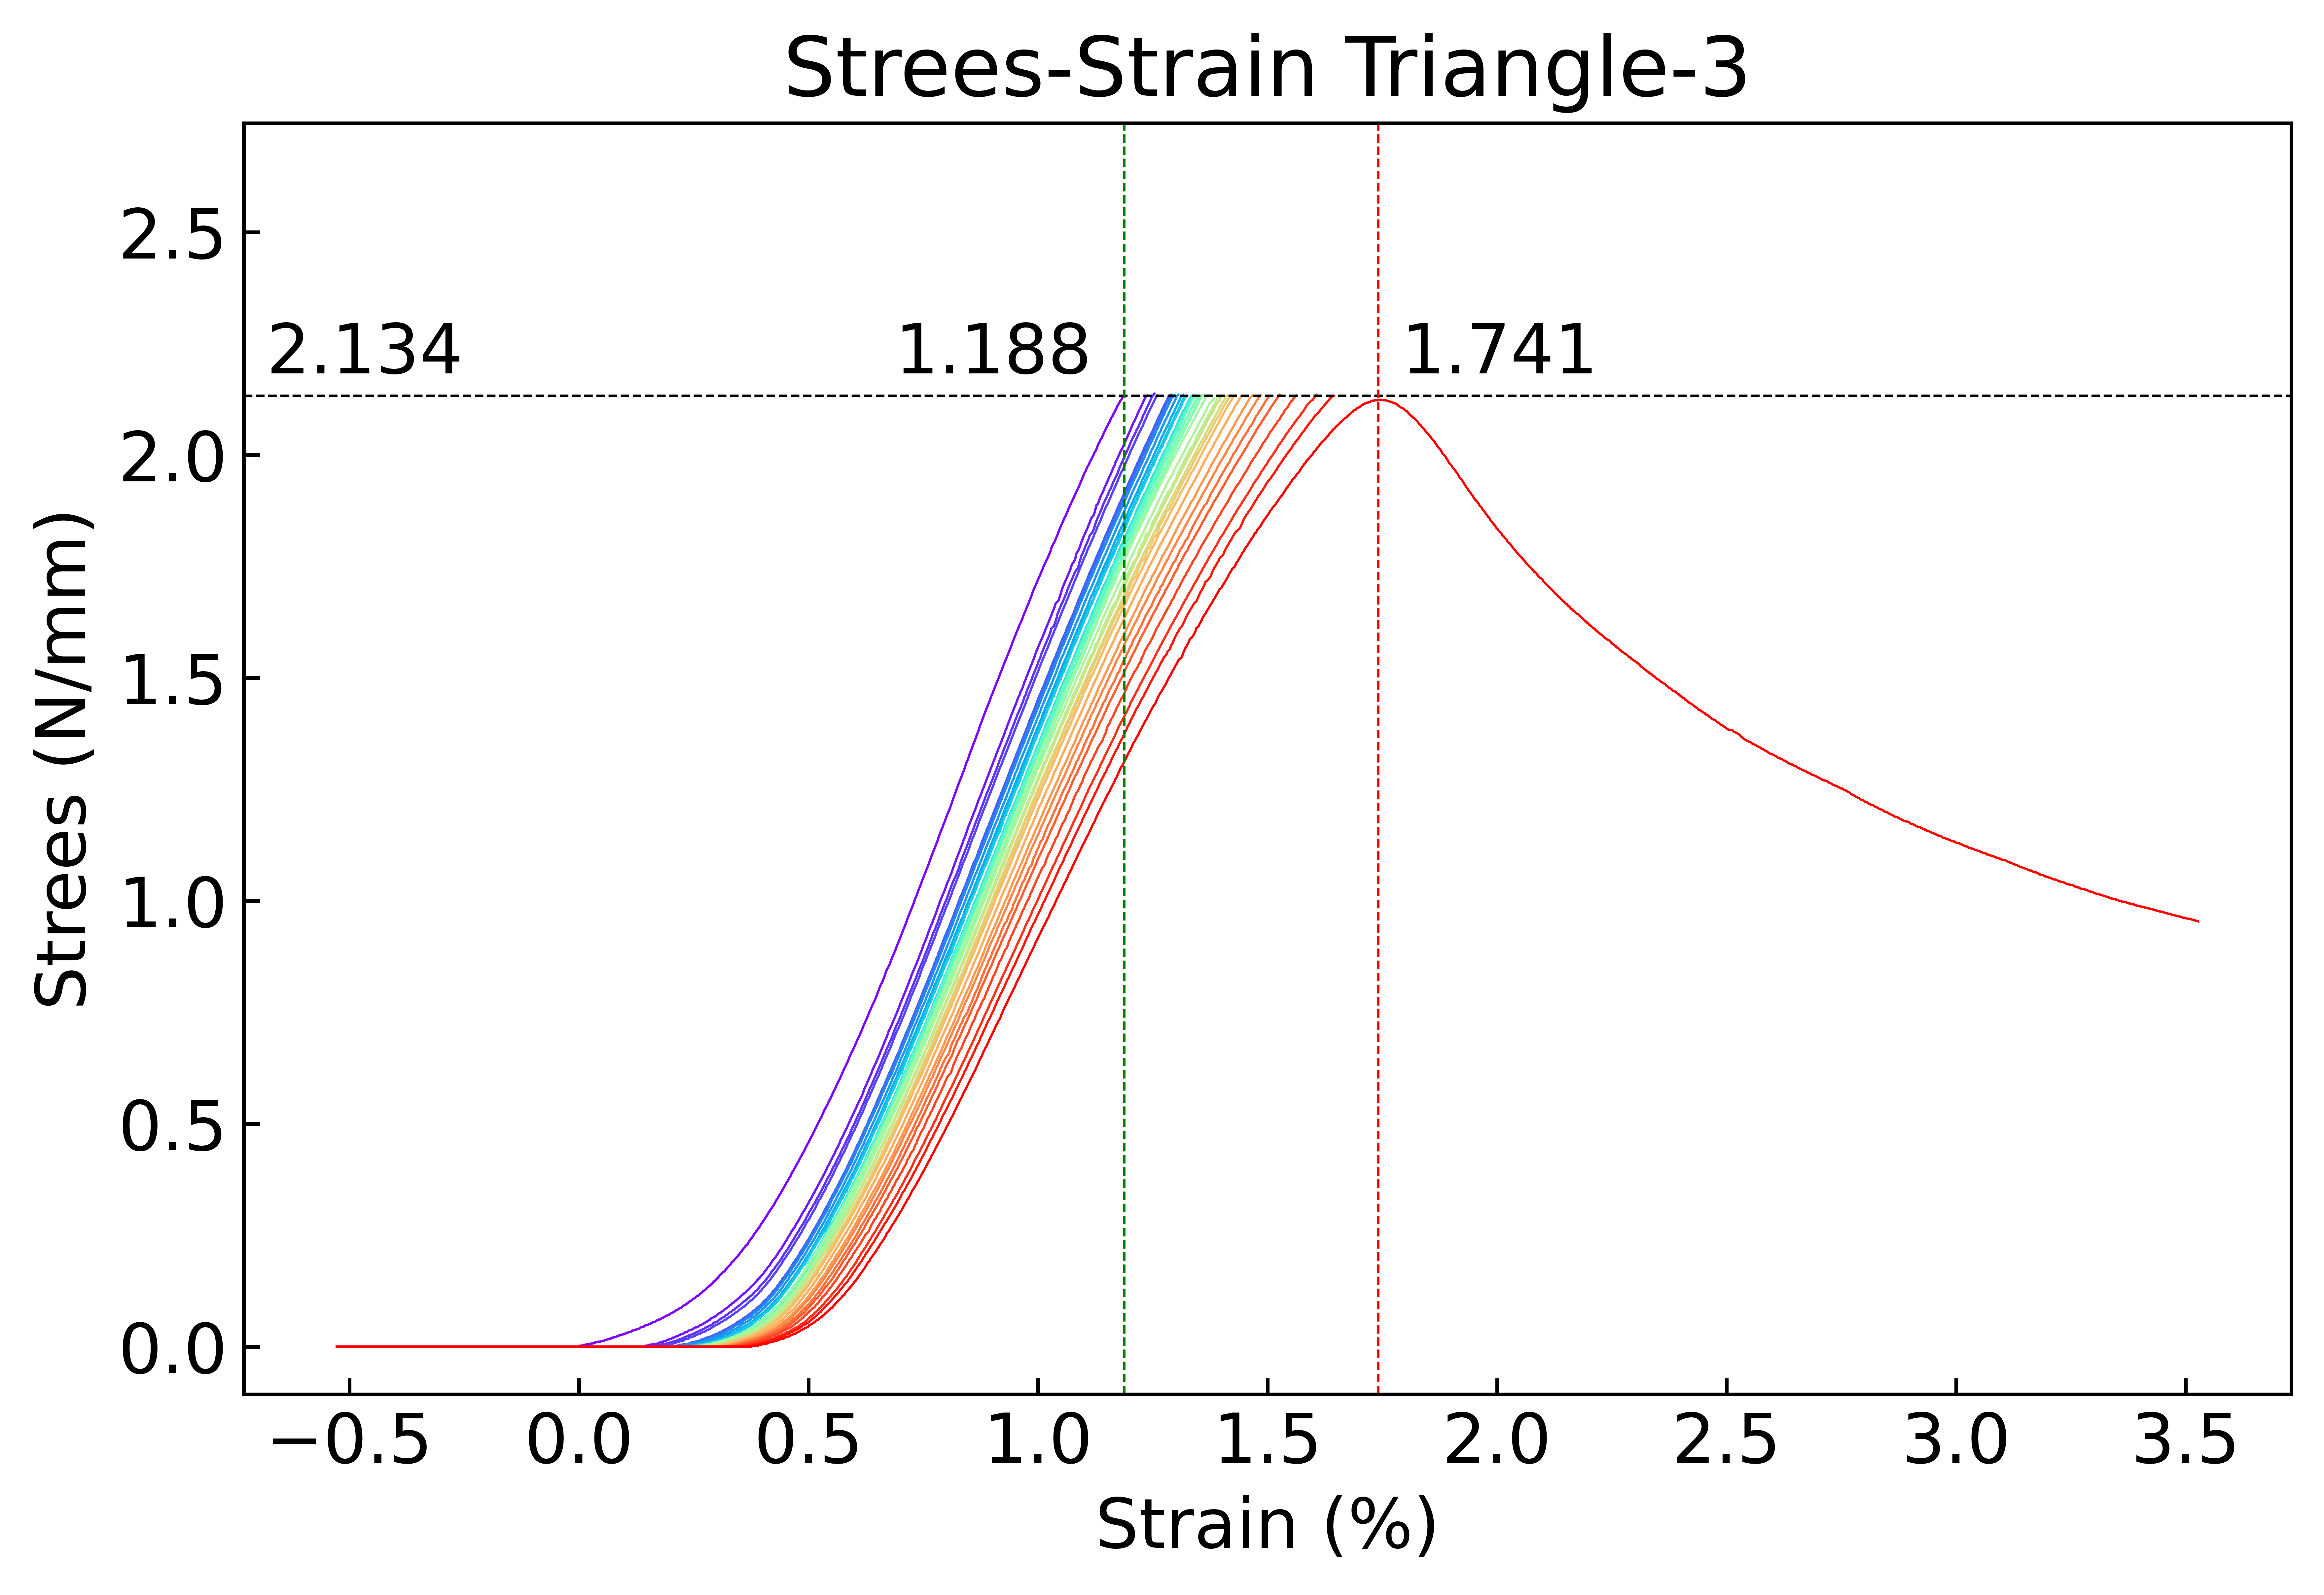

In [20]:
# set style and size

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 5), dpi=1000)
colors = plt.cm.rainbow(np.linspace(0, 1, len(data)))
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
area = 0.05

# draw

for i in range(0, len(data)):
    plt.plot(data[i][:,1], data[i][:,4], label=i, color=colors[i], linewidth=0.5) # 1:mm 4:應力 5:應變

# set size and sight line

xlim = plt.xlim()
ylim = plt.ylim()

ylim = (ylim[0], ylim[1] + 0.5)

plt.plot(xlim, (average_max_value, average_max_value), color="black", linewidth=0.5, linestyle='--')
plt.text(xlim[0] + area, average_max_value + area, round(average_max_value, 3))

if min_deformation != max_deformation:
    plt.plot((min_deformation, min_deformation), ylim, color="green", linewidth=0.5, linestyle='--')
    plt.text(min_deformation - 0.5, average_max_value + area, round(min_deformation, 3))

plt.plot((max_deformation, max_deformation), ylim, color="red", linewidth=0.5, linestyle='--')
plt.text(max_deformation + area, average_max_value + area, round(max_deformation, 3))

plt.xlim(xlim)
plt.ylim(ylim)

# set other

plt.xlabel("Strain (%)")
plt.ylabel("Strees (N/mm)")

plt.title(title)

# save img and show

plt.savefig(savePath, bbox_inches='tight')

plt.show()